In [1]:
#%pip install numpy

In [1]:
import numpy as np 

In [10]:
#%pip install pandas

In [5]:
import pandas as pd 

In [11]:
#%pip install seaborn

In [7]:
import seaborn as sns  

In [12]:
#%pip install matplotlib

In [9]:
import matplotlib.pyplot as plt

### Step 1: Import Dataset

In [13]:
dataset = pd.read_csv("breast-cancer-wisconsin-data_data.csv")

In [14]:
# Check the format of the dataset
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [15]:
# Check if any null values exist
dataset.isnull().sum()
dataset.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

### Step 2: Exploratory Data Analysis (EDA)

In [16]:
# How many rows fall into each Diagnosis category 
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [17]:
diagnosis_coder = {'M':1, 'B':0}

In [18]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
dataset.diagnosis = dataset.diagnosis.map(diagnosis_coder)

In [19]:
dataset.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [20]:
y = dataset.diagnosis

In [21]:
outcome_count = pd.DataFrame(pd.Series(y.value_counts()))
outcome_count.index = ['Benign', 'Malignant']

In [22]:
outcome_count['percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis'])
outcome_count

,diagnosis,percent
Benign,357,62.741652
Malignant,212,37.258348


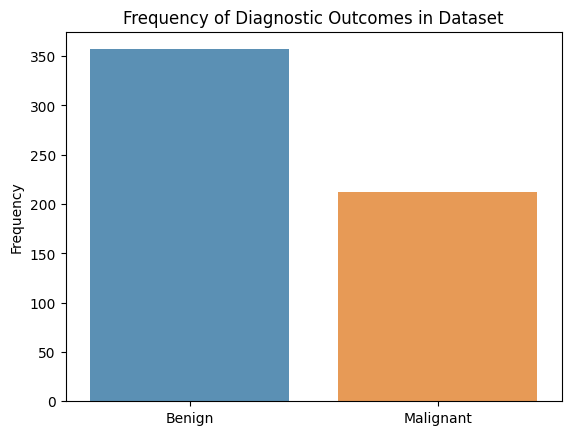

In [23]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

#### Exploring data using Histogram Plots

There are now 30 variables we can visualise splitting the dataset into 3 plots containing 10 variables each. The dataset is conveniently ordered into distinct groups: mean, se and worst

In [24]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data
data_n = dataset[dataset['diagnosis'] == 0]
data_y = dataset[dataset['diagnosis'] == 1]

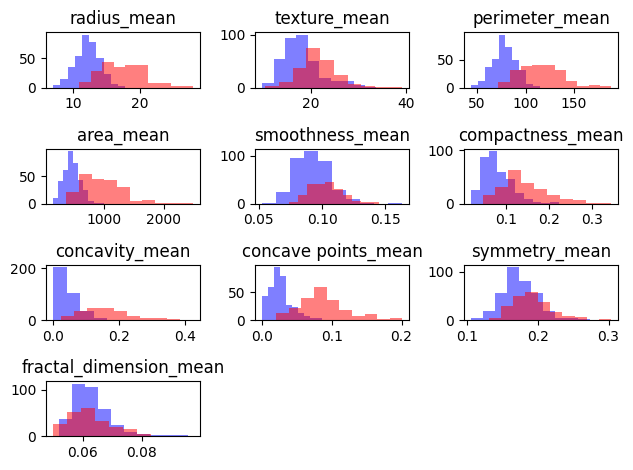

In [25]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[1:11])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

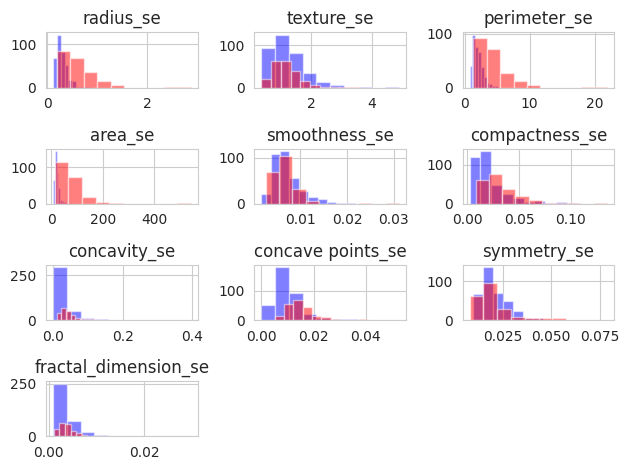

In [26]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[11:21])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

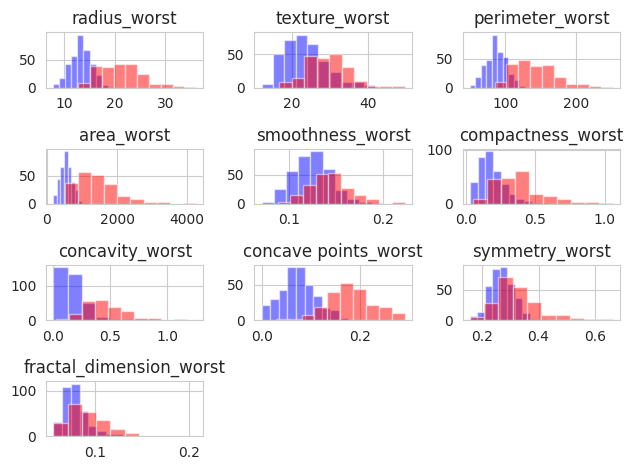

In [27]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate((dataset.columns[21:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(4,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()  

* In general, malignant tumors have higher values for most measurements. Radius, texture, smoothness, compactness and concavity are of particular interest. The distribution of malignant and benign cells appear to be shifted to the right and/or shaped differently for several of the features, particularly concavity and radius.
* Comparison of radius distribution by malignancy shows that there is no perfect separation between any of the features; we do have fairly good separations for concave.points_worst, concavity_worst, perimeter_worst, area_mean, perimeter_mean. We do have as well tight superposition for some of the values, like symmetry_se, smoothness_se .

#### Exploring data using Violin Plots

In [28]:
list = ['id','diagnosis']
# X includes our variables
X = dataset.drop(list,axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

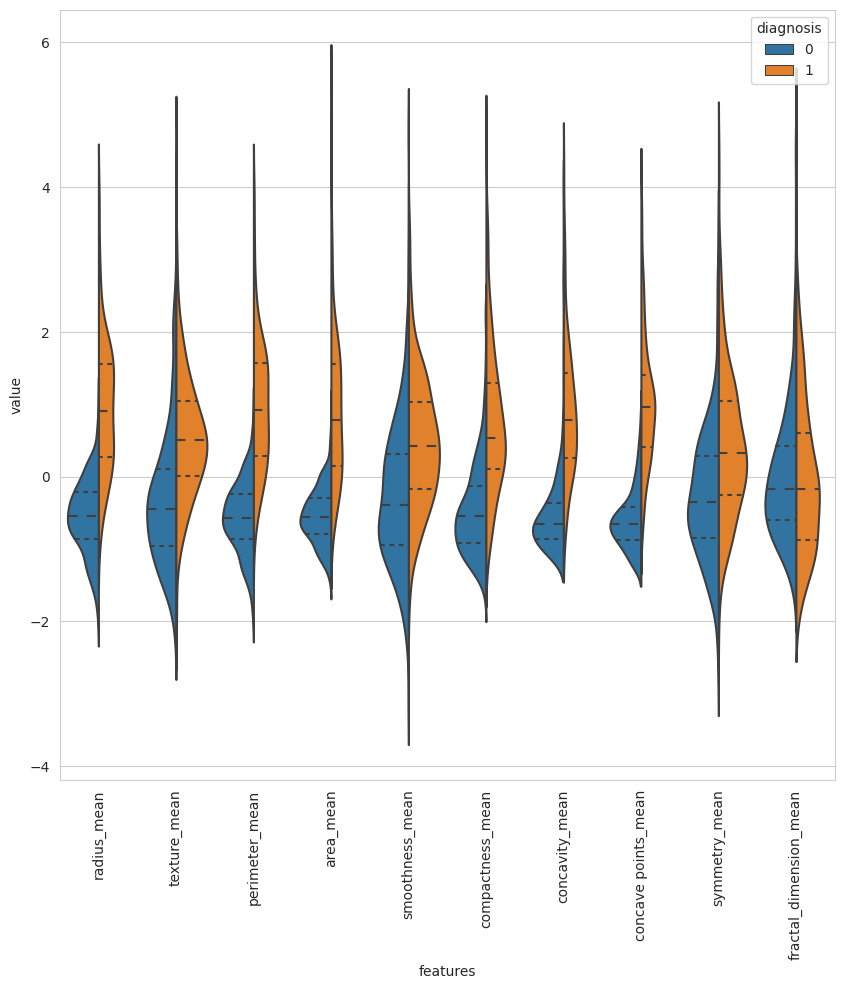

In [29]:
# get the first ten variables
data = X
data_std = (data - data.mean()) / (data.std()) # standardization
# get the first 10 variables
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
# melt function allows for the numeric columns dataset to be pivoted and two new variables are created: value and variable
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

The median of texture_mean for Malignant and Benign looks separated while for symmetry_mean and fractal_dimension_mean, the medians of the diagnosis groups are closely related. Because of this texture_mean would be the better choice for classification. From the below chart the medians for almost all Malignant or Benign don't vary much for the standard error. The distribution curve for area_se is skewed. The distribution of datapoints for area_worst look well separated, so it might be easier to use this feature for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

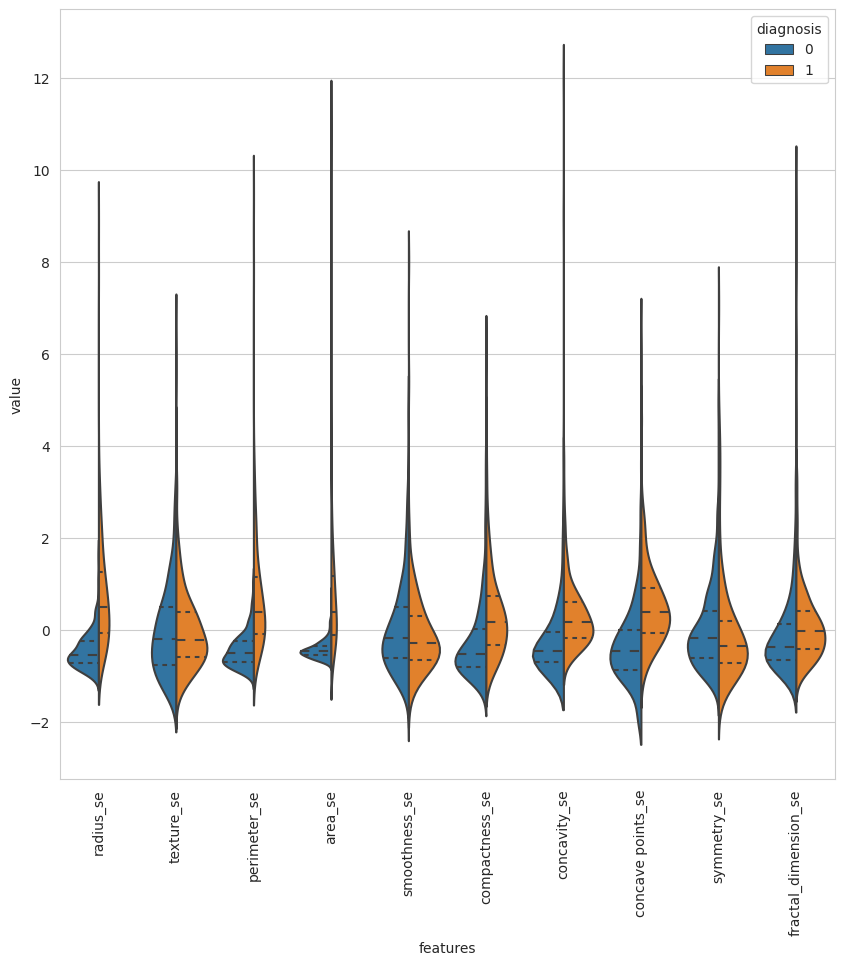

In [30]:
# Second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

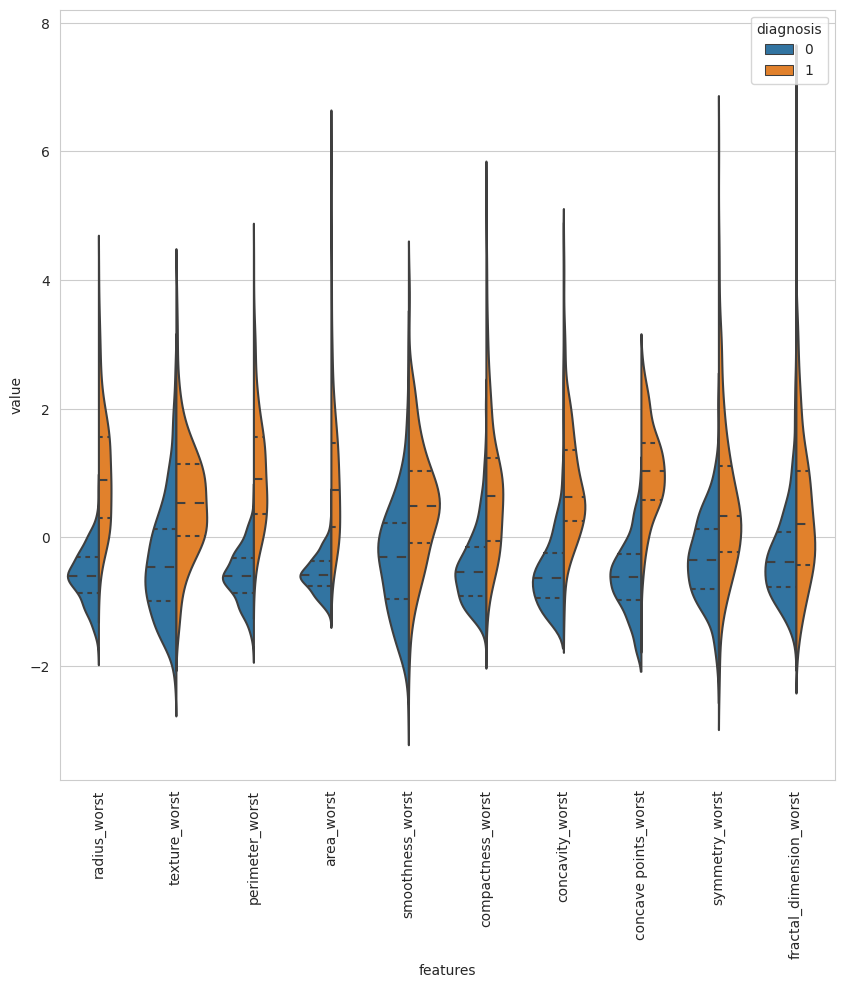

In [31]:
# Last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this variables that have a high correlation will be removed.

Our objective is to identify which features are most helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant.

### Step 3: Feature Selection

##### Correlation Matrix/Heat Map for feature selection

In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this variables that have a high correlation will be removed.

* From the correlation matrix above, here are quite a few variavles with high correlations. The formulas return a value between -1 and 1, where: 1 indicates a strong positive relationship. -1 indicates a strong negative relationship. A result of zero indicates no relationship at all. 
* In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this I've dropped variables with a correlation higher than .95.
* There are quite a few variables that are correlated. Often we have features that are highly correlated and those provide redundant information. By eliminating highly correlated features we can avoid a predictive bias for the information contained in these features. This also shows us, that when we want to make statements about the biological/ medical importance of specific features, we need to keep in mind that just because they are suitable to predicting an outcome they are not necessarily causal - they could simply be correlated with causal factors.

<AxesSubplot:>

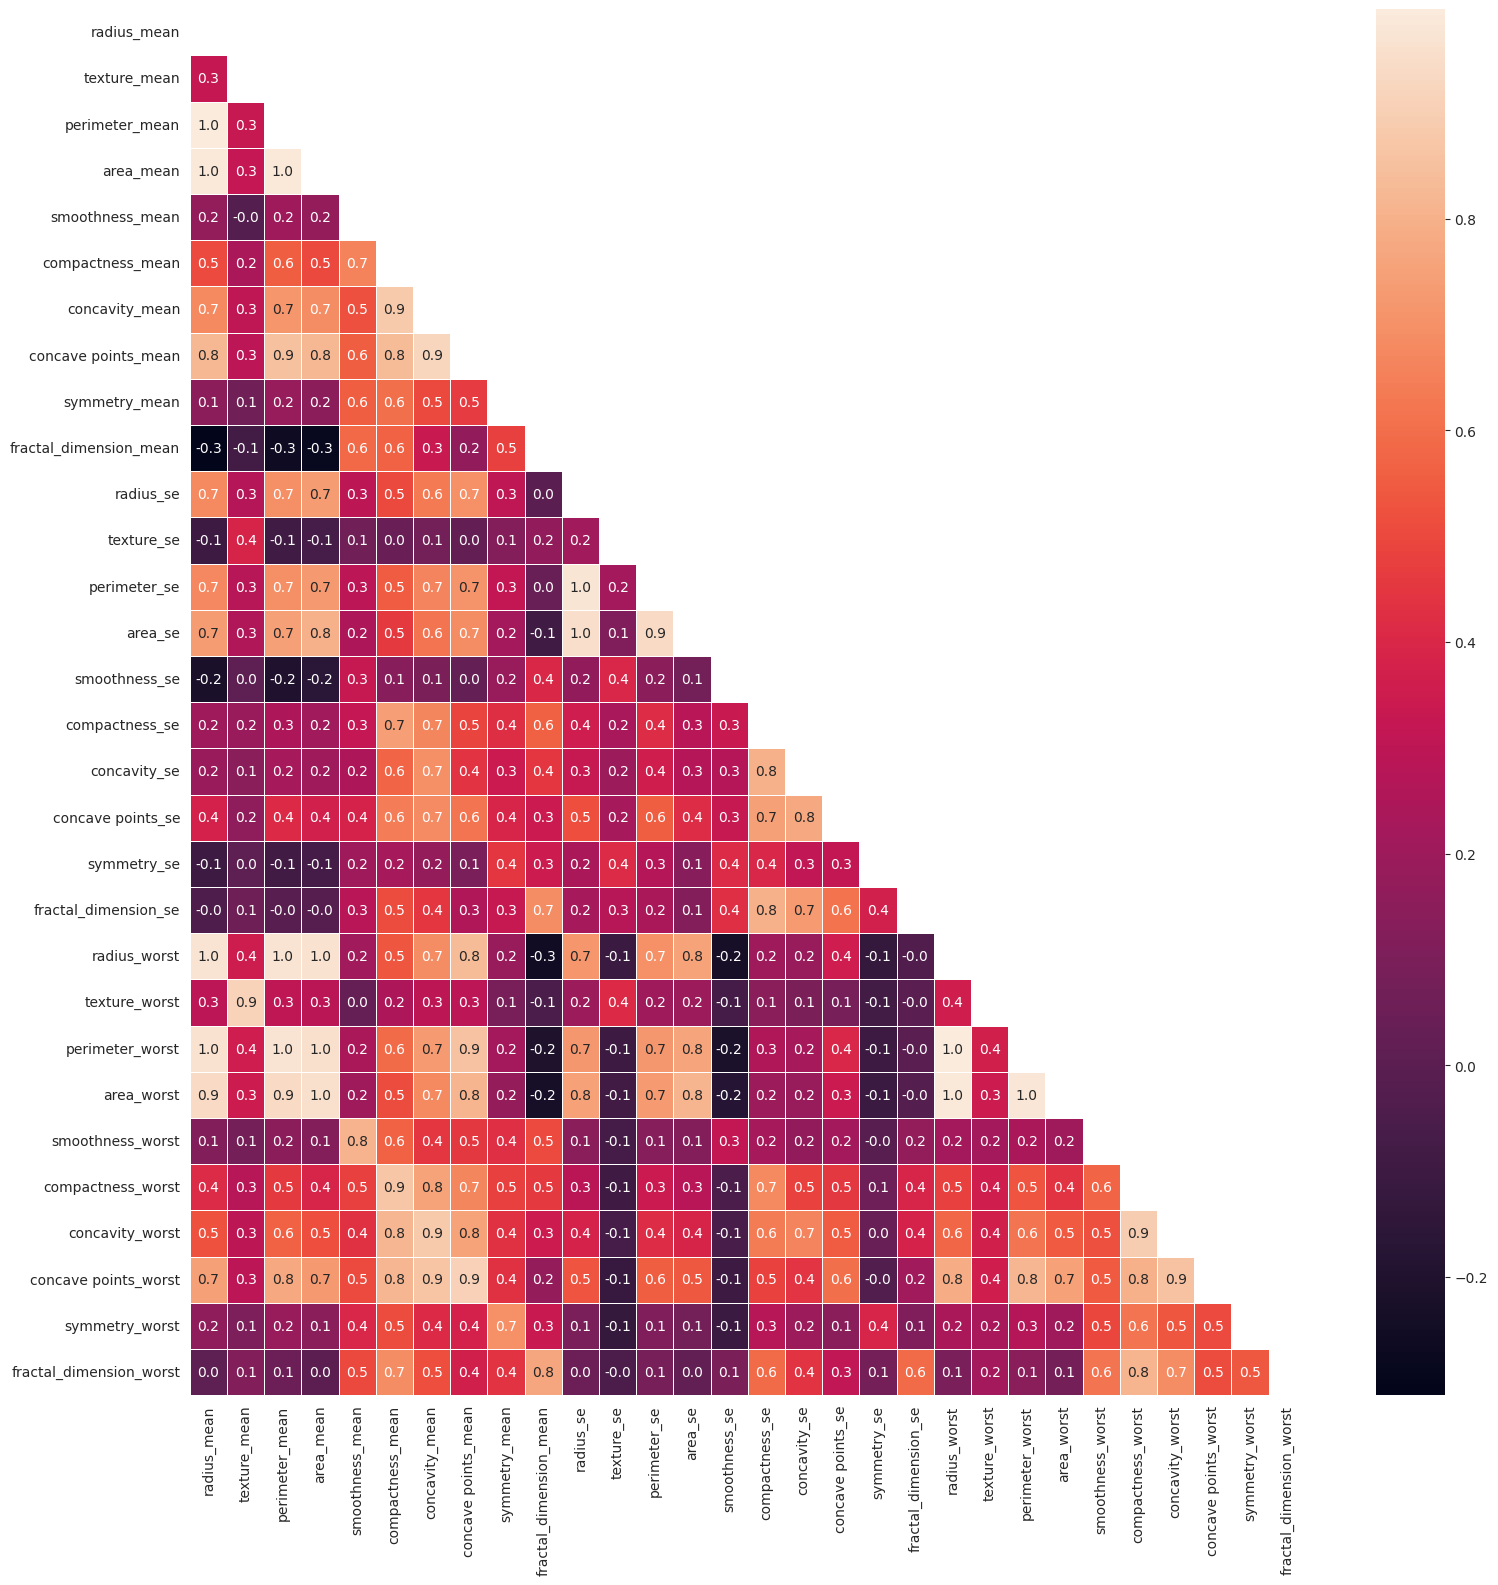

In [32]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [127]:
# Create a full correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

From the correlation matrix above, here are quite a few variavles with high correlations. In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Because of this I've dropped variables with a correlation higher than .95.

In [128]:
# Find index of feature columns with correlation greater than 0.95
# Spot check these columns against the above matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [129]:
selected_feature_corr = X.drop(X[to_drop], axis=1)

##### Chi-Square for feature selection

In [130]:
#%pip install scikit-learn

In [131]:
#%pip install sklearn

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [134]:
# this is how we can make a list of the selected features
selected_feature_chi2 = x_train.columns[select_feature.get_support()]

In [135]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 10 feature by Chi2:',selected_feature_chi2)

total features: 30
selected features: 10
Chosen best 10 feature by Chi2: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')


In [136]:
selected_feature_chi2 = X.drop(columns=[col for col in X if col not in selected_feature_chi2])

##### Random Forest for the feature selection

In [137]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and rank each pixel
rf_1 = RandomForestClassifier()      
rfe = RFE(estimator=rf_1, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)
# let's print the number of total and selected features

In [138]:
# this is how we can make a list of the selected features
selected_feature_rfe = x_train.columns[rfe.support_]

In [139]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfe)))
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

total features: 30
selected features: 10
Chosen best 10 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [140]:
selected_feature_rfe = X.drop(columns=[col for col in X if col not in selected_feature_rfe])

* I've used two different methods with similar results based on there being 10 best features however this is just an assumption - it could have been any number of features. Therefor I will use cross validation to not only find best features but also find how many features do I need for best accuracy.

In [141]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
rf_2 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_2, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

In [142]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_rfecv = x_train.columns[rfecv.support_]

In [143]:
# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_rfecv)))
print('Optimal number of features :', rfecv.n_features_)
print('Best features by rfecv:',x_train.columns[rfecv.support_])


total features: 30
selected features: 30
Optimal number of features : 30
Best features by rfecv: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [144]:
selected_feature_rfecv = X.drop(columns=[col for col in X if col not in selected_feature_rfecv])

### Step 4 Machine Learning

* We want to build a model which classifies tumors as benign or malignant. I used sklearn’s Logistic Regression, Support Vector Classifier, Decision Tree and Random Forest for this purpose.
* We will build three different models (1. Logistic Regression, 2. Support Vector Classifier, 3. Random Forest) for each eight feature selection method ( 1. Correlation, 2. Chi-square, 3. Recursive Feature Elimination (RF), 4. Cross-validation).

In [145]:
Y = dataset.iloc[:, 31].values
dataframe = pd.DataFrame(Y)

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
# Changing diagnosis into a numeric column
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
#print(labelencoder_y.fit_transform(y))

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. I will Split the available data into a training set and a testing set. (70% training, 30% test)

#### Training and testing performance for each feature selection method.

In [148]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#### Feature Selection : Correlation

In [149]:
#(70% training, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(selected_feature_corr, Y,  test_size=0.3, random_state=0)

In [150]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
#len(X_train)

In [152]:
#len(X_test)

In [153]:
# Normalize data
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_train.mean())/(X_test.max()-X_test.min())

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

 ###### SGD Classifier

In [155]:
sgd_clf = SGDClassifier(random_state=0, loss='log')
sgd_acc = cross_val_score(sgd_clf, X_train_N, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
sgd_proba = cross_val_predict(sgd_clf, X_train_N, Y_train, cv=3, method='predict_proba')
sgd_scores = sgd_proba[:, 1] # get the score of the positive class 
sgd_acc

array([0.96240602, 0.94736842, 0.96969697])

 ###### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_acc = cross_val_score(lr, X_train_N, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_N, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]
lr_acc

array([0.90977444, 0.89473684, 0.92424242])

 ###### Random Forests

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf_acc = cross_val_score(rf, X_train_N, Y_train, cv=3, n_jobs=-1)
rf_proba = cross_val_predict(rf, X_train_N, Y_train, cv=3, method='predict_proba')
rf_scores = rf_proba[:, 1] # Get the probability of the positive class
rf_acc

array([0.93984962, 0.94736842, 0.95454545])

In [158]:
print('Correlation Selection: sgd classifier accuracy {:.3f} '.format(np.average(sgd_acc)))
print('Correlation Selection: logistic regression classifier accuracy {:.3f} '.format(np.average(lr_acc)))
print('Correlation Selection: random forest classifier accuracy {:.3f} '.format(np.average(rf_acc)))

Correlation Selection: sgd classifier accuracy 0.960 
Correlation Selection: logistic regression classifier accuracy 0.910 
Correlation Selection: random forest classifier accuracy 0.947 


We want an ROC curve that sticks as close to the left vertical side of the graph as possible. Although all three curves are simplier, sgd classifier and random forest stick closest to the y-axis.
A perfect ROC score is one. You can see here that all of our algorithms achieve an AUC score close to 1. Again sgd classifier and random forest have a higher score than logistic regression.

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve: {}'.format(title), fontsize=10)
    plt.show()

AUC Score (logistic regression): 0.98 


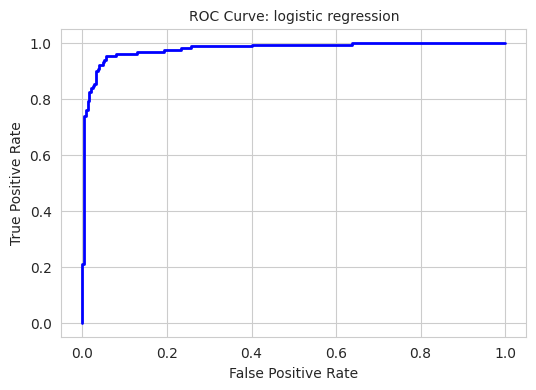

AUC Score (sgd_classifier): 0.99 


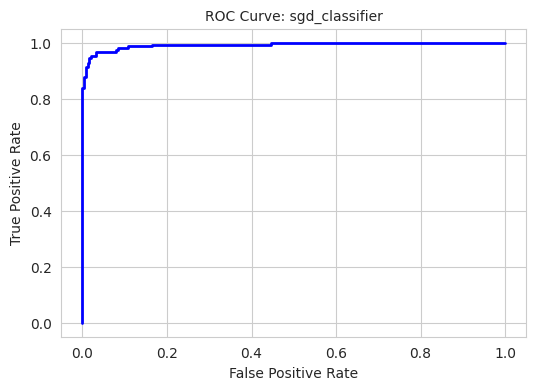

AUC Score (random_forest): 0.99 


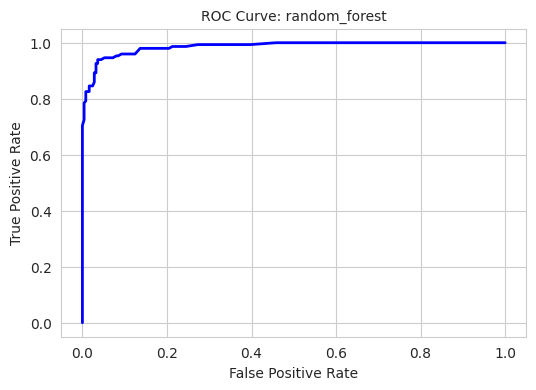

In [160]:
ROC_curve('logistic regression', Y_train, lr_scores)
ROC_curve('sgd_classifier', Y_train, sgd_scores)
ROC_curve('random_forest', Y_train, rf_scores)

Next we look at precision and recall scores for each algorithms since the ROC curves are very similar. Precision is the ratio of true positives to the total number of samples classified as positive by the algorithm: <br>
$\frac{TP}{TP + FP}$

Recall is the number of positive samples that were accurately classified as positive to the number of positive samples in the data set: <br>
$\frac{TP}{TP + FN}$

In [161]:
from sklearn.metrics import precision_score, recall_score
# Logistic regression
y_train_pred_lr = cross_val_predict(lr, X_train_N, Y_train, cv=3)
lr_precision = precision_score(Y_train, y_train_pred_lr)
lr_recall = recall_score(Y_train, y_train_pred_lr)
# SGD Classifier
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_N, Y_train, cv=3)
sgd_precision = precision_score(Y_train, y_train_pred_sgd)
sgd_recall = recall_score(Y_train, y_train_pred_sgd)
# Random forest
y_train_pred_rf = cross_val_predict(rf, X_train_N, Y_train, cv=3)
rf_precision = precision_score(Y_train, y_train_pred_rf)
rf_recall = recall_score(Y_train, y_train_pred_rf)

In [162]:
print('Logistic regression: Precision {:.2f}; Recall {:.2f} '.format(lr_precision, lr_recall))
print('SGD Classifier: Precision {:.2f}; Recall {:.2f} '.format(sgd_precision, sgd_recall))
print('Random Forest: Precision {:.2f}; Recall {:.2f} '.format(rf_precision, rf_recall))

Logistic regression: Precision 0.97; Recall 0.78 
SGD Classifier: Precision 0.98; Recall 0.91 
Random Forest: Precision 0.94; Recall 0.91 


Since we care more about recall, than precision when classifying malignant or benign tumors, and all of the algorithms perform reasonably well with respect to precision, it seems like sgd classifier or random forest are the best fits for our model after correlation based selection.

#### Feature Selection: Chi-Square

 ###### SGD Classifier

In [163]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(selected_feature_chi2, Y,  test_size=0.3, random_state=0)

In [164]:
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

X_train_N1 = (X_train1-X_train1.mean())/(X_train1.max()-X_train1.min())
X_test_N1 = (X_test1-X_train1.mean())/(X_test1.max()-X_test1.min())

In [165]:
sgd_clf1 = SGDClassifier(random_state=0, loss='log')
sgd_acc1 = cross_val_score(sgd_clf1, X_train_N1, Y_train1, cv=3, scoring="accuracy",  n_jobs=-1)
sgd_proba1 = cross_val_predict(sgd_clf1, X_train_N1, Y_train1, cv=3, method='predict_proba')
sgd_scores1 = sgd_proba1[:, 1] # get the score of the positive class 
sgd_acc1

array([0.93984962, 0.90225564, 0.95454545])

 ###### Logistic Regression

In [166]:
lr1 = LogisticRegression()
lr_acc1 = cross_val_score(lr1, X_train_N1, Y_train1, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba1 = cross_val_predict(lr1, X_train_N1, Y_train1, cv=3, method='predict_proba')
lr_scores1 = lr_proba1[:, 1]
lr_acc1

array([0.86466165, 0.90225564, 0.89393939])

 ###### Random Forest

In [167]:
rf1 = RandomForestClassifier(random_state=0)
rf_acc1 = cross_val_score(rf1, X_train_N1, Y_train1, cv=3, n_jobs=-1)
rf_proba1 = cross_val_predict(rf1, X_train_N1, Y_train1, cv=3, method='predict_proba')
rf_scores1 = rf_proba1[:, 1] # Get the probability of the positive class
rf_acc1

array([0.93984962, 0.93233083, 0.93939394])

In [168]:
print('Chi-Square Selection: sgd classifier accuracy {:.3f} '.format(np.average(sgd_acc1)))
print('Chi-Square Selection: logistic regression classifier accuracy {:.3f} '.format(np.average(lr_acc1)))
print('Chi-Square Selection: random forest classifier accuracy {:.3f} '.format(np.average(rf_acc1)))

Chi-Square Selection: sgd classifier accuracy 0.932 
Chi-Square Selection: logistic regression classifier accuracy 0.887 
Chi-Square Selection: random forest classifier accuracy 0.937 


In [169]:
def ROC_curve(title, Y_train1, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train1, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train1, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve: {}'.format(title), fontsize=10)
    plt.show()

AUC Score (logistic regression): 0.97 


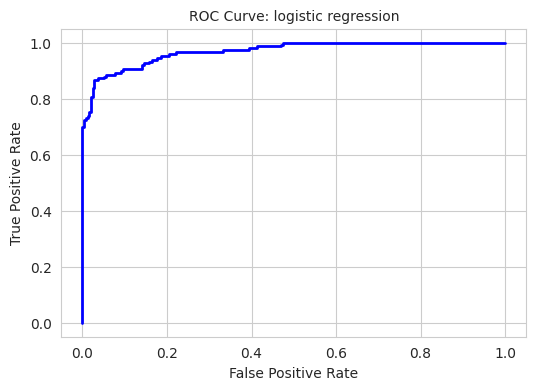

AUC Score (sgd_classifier): 0.97 


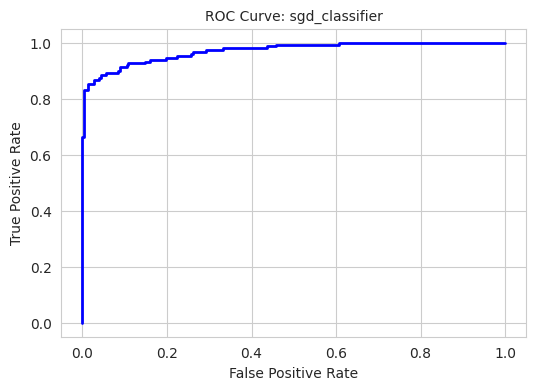

AUC Score (random_forest): 0.98 


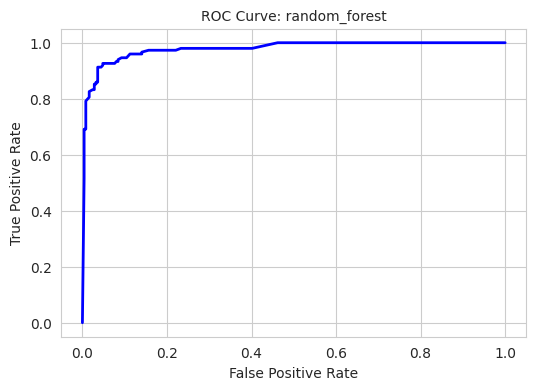

In [170]:
ROC_curve('logistic regression', Y_train1, lr_scores1)
ROC_curve('sgd_classifier', Y_train1, sgd_scores1)
ROC_curve('random_forest', Y_train1, rf_scores1)

In [171]:
# Logistic regression
y_train_pred_lr1 = cross_val_predict(lr1, X_train_N1, Y_train1, cv=3)
lr_precision1 = precision_score(Y_train1, y_train_pred_lr1)
lr_recall1 = recall_score(Y_train1, y_train_pred_lr1)
# SGD Classifier
y_train_pred_sgd1 = cross_val_predict(sgd_clf1, X_train_N1, Y_train1, cv=3)
sgd_precision1 = precision_score(Y_train1, y_train_pred_sgd1)
sgd_recall1 = recall_score(Y_train1, y_train_pred_sgd1)
# Random forest
y_train_pred_rf1 = cross_val_predict(rf1, X_train_N1, Y_train1, cv=3)
rf_precision1 = precision_score(Y_train1, y_train_pred_rf1)
rf_recall1 = recall_score(Y_train1, y_train_pred_rf1)

print('Logistic regression: Precision {:.2f}; Recall {:.2f} '.format(lr_precision1, lr_recall1))
print('SGD Classifier: Precision {:.2f}; Recall {:.2f} '.format(sgd_precision1, sgd_recall1))
print('Random Forest: Precision {:.2f}; Recall {:.2f} '.format(rf_precision1, rf_recall1))

Logistic regression: Precision 1.00; Recall 0.70 
SGD Classifier: Precision 0.95; Recall 0.87 
Random Forest: Precision 0.94; Recall 0.89 


* Best fit for our model after chi-squared selection is Random Forest

#### Feature Selection: Random Forest

In [172]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(selected_feature_rfe, Y,  test_size=0.3, random_state=0)

In [173]:
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

X_train_N2 = (X_train2-X_train2.mean())/(X_train2.max()-X_train2.min())
X_test_N2 = (X_test2-X_train2.mean())/(X_test2.max()-X_test2.min())

 ###### SGD Classifier

In [174]:
sgd_clf2 = SGDClassifier(random_state=0, loss='log')
sgd_acc2 = cross_val_score(sgd_clf2, X_train_N2, Y_train2, cv=3, scoring="accuracy",  n_jobs=-2)
sgd_proba2 = cross_val_predict(sgd_clf2, X_train_N2, Y_train2, cv=3, method='predict_proba')
sgd_scores2 = sgd_proba2[:, 1] # get the score of the positive class 
sgd_acc2

array([0.96240602, 0.93984962, 0.98484848])

 ###### Logistic Regression

In [175]:
lr2 = LogisticRegression()
lr_acc2 = cross_val_score(lr2, X_train_N2, Y_train2, cv=3, scoring='accuracy', n_jobs=-2)
lr_proba2 = cross_val_predict(lr2, X_train_N2, Y_train2, cv=3, method='predict_proba')
lr_scores2 = lr_proba2[:, 1]
lr_acc2

array([0.91729323, 0.90977444, 0.93181818])

 ###### Random Forest

In [176]:
rf2 = RandomForestClassifier(random_state=0)
rf_acc2 = cross_val_score(rf2, X_train_N2, Y_train2, cv=3, n_jobs=-2)
rf_proba2 = cross_val_predict(rf2, X_train_N2, Y_train2, cv=3, method='predict_proba')
rf_scores2 = rf_proba2[:, 1] # Get the probability of the positive class
rf_acc2

array([0.96992481, 0.93233083, 0.96969697])

In [177]:
print('Random Forect Selection: sgd classifier accuracy {:.3f} '.format(np.average(sgd_acc2)))
print('Random Forect Selection: logistic regression classifier accuracy {:.3f} '.format(np.average(lr_acc2)))
print('Random Forect Selection: random forest classifier accuracy {:.3f} '.format(np.average(rf_acc2)))

Random Forect Selection: sgd classifier accuracy 0.962 
Random Forect Selection: logistic regression classifier accuracy 0.920 
Random Forect Selection: random forest classifier accuracy 0.957 


AUC Score (logistic regression): 0.99 


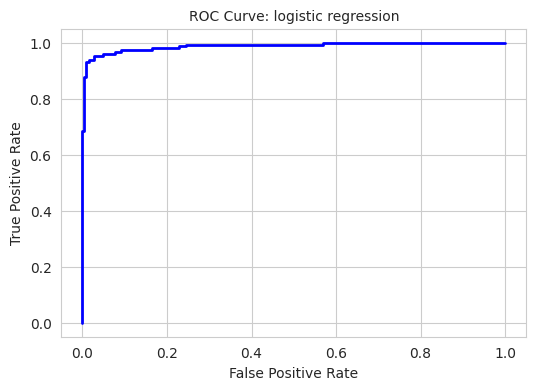

AUC Score (sgd_classifier): 0.99 


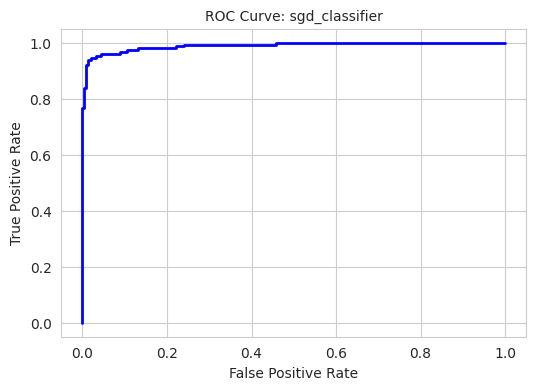

AUC Score (random_forest): 0.99 


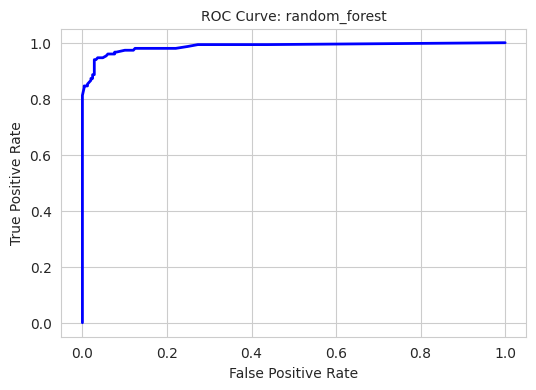

In [178]:
def ROC_curve(title, Y_train2, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train2, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train2, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve: {}'.format(title), fontsize=10)
    plt.show()

ROC_curve('logistic regression', Y_train2, lr_scores2)
ROC_curve('sgd_classifier', Y_train2, sgd_scores2)
ROC_curve('random_forest', Y_train2, rf_scores2)

In [179]:
# Logistic regression
y_train_pred_lr2 = cross_val_predict(lr2, X_train_N2, Y_train2, cv=3)
lr_precision2 = precision_score(Y_train2, y_train_pred_lr2)
lr_recall2 = recall_score(Y_train2, y_train_pred_lr2)
# SGD Classifier
y_train_pred_sgd2 = cross_val_predict(sgd_clf2, X_train_N2, Y_train2, cv=3)
sgd_precision2 = precision_score(Y_train2, y_train_pred_sgd2)
sgd_recall2 = recall_score(Y_train2, y_train_pred_sgd2)
# Random forest
y_train_pred_rf2 = cross_val_predict(rf2, X_train_N2, Y_train2, cv=3)
rf_precision2 = precision_score(Y_train2, y_train_pred_rf2)
rf_recall2 = recall_score(Y_train2, y_train_pred_rf2)

print('Logistic regression: Precision {:.2f}; Recall {:.2f} '.format(lr_precision2, lr_recall2))
print('SGD Classifier: Precision {:.2f}; Recall {:.2f} '.format(sgd_precision2, sgd_recall2))
print('Random Forest: Precision {:.2f}; Recall {:.2f} '.format(rf_precision2, rf_recall2))

Logistic regression: Precision 0.99; Recall 0.79 
SGD Classifier: Precision 0.98; Recall 0.92 
Random Forest: Precision 0.95; Recall 0.93 


* SGD Classifier is the best fit for our model after Random Forest selection

#### Feature Selection: Cross Validation

In [180]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(selected_feature_rfecv, Y,  test_size=0.3, random_state=0)

In [181]:
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

In [182]:
X_train_N3 = (X_train3-X_train3.mean())/(X_train3.max()-X_train3.min())
X_test_N3 = (X_test3-X_train3.mean())/(X_test3.max()-X_test3.min())

 ###### SGD Classifier

In [183]:
sgd_clf3 = SGDClassifier(random_state=0, loss='log')
sgd_acc3 = cross_val_score(sgd_clf3, X_train_N3, Y_train3, cv=3, scoring="accuracy",  n_jobs=-3)
sgd_proba3 = cross_val_predict(sgd_clf3, X_train_N3, Y_train3, cv=3, method='predict_proba')
sgd_scores3 = sgd_proba3[:, 1] # get the score of the positive class 
sgd_acc3

array([0.97744361, 0.96240602, 0.98484848])

 ###### Logistic Regression

In [184]:
lr3 = LogisticRegression()
lr_acc3 = cross_val_score(lr3, X_train_N3, Y_train3, cv=3, scoring='accuracy', n_jobs=-3)
lr_proba3 = cross_val_predict(lr3, X_train_N3, Y_train3, cv=3, method='predict_proba')
lr_scores3 = lr_proba3[:, 1]
lr_acc3

array([0.93233083, 0.90977444, 0.93181818])

 ###### Random Forest

In [185]:
rf3 = RandomForestClassifier(random_state=0)
rf_acc3 = cross_val_score(rf3, X_train_N3, Y_train3, cv=3, n_jobs=-3)
rf_proba3 = cross_val_predict(rf3, X_train_N3, Y_train3, cv=3, method='predict_proba')
rf_scores3 = rf_proba3[:, 1] # Get the probability of the positive class
rf_acc3

array([0.94736842, 0.93984962, 0.96969697])

In [186]:
print('Cross Validation: sgd classifier accuracy {:.3f} '.format(np.average(sgd_acc3)))
print('Cross Validation: logistic regression classifier accuracy {:.3f} '.format(np.average(lr_acc3)))
print('Cross Validation: random forest classifier accuracy {:.3f} '.format(np.average(rf_acc3)))

Cross Validation: sgd classifier accuracy 0.975 
Cross Validation: logistic regression classifier accuracy 0.925 
Cross Validation: random forest classifier accuracy 0.952 


AUC Score (logistic regression): 0.987 


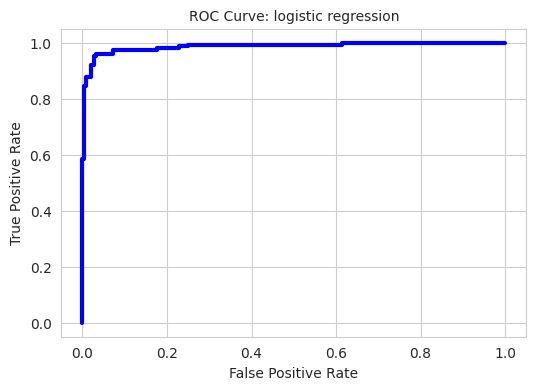

AUC Score (sgd_classifier): 0.993 


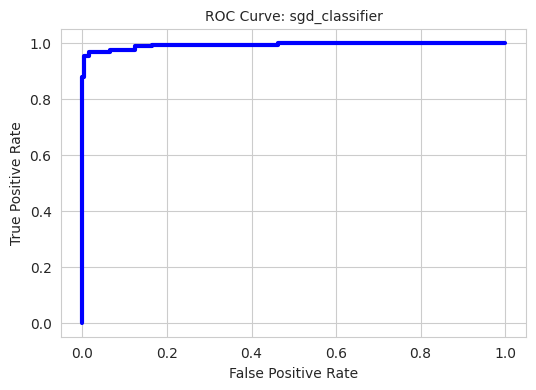

AUC Score (random_forest): 0.986 


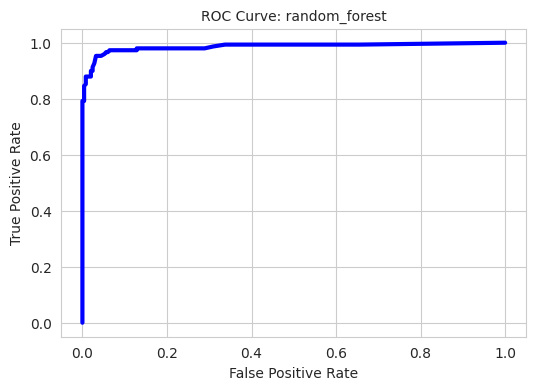

In [187]:
def ROC_curve(title, Y_train3, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train3, scores)
    print('AUC Score ({}): {:.3f} '.format(title, roc_auc_score(Y_train3, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=3, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title('ROC Curve: {}'.format(title), fontsize=10)
    plt.show()

ROC_curve('logistic regression', Y_train3, lr_scores3)
ROC_curve('sgd_classifier', Y_train3, sgd_scores3)
ROC_curve('random_forest', Y_train3, rf_scores3)


In [188]:
# Logistic regression
y_train_pred_lr3 = cross_val_predict(lr3, X_train_N3, Y_train3, cv=3)
lr_precision3 = precision_score(Y_train3, y_train_pred_lr3)
lr_recall3 = recall_score(Y_train3, y_train_pred_lr3)
# SGD Classifier
y_train_pred_sgd3 = cross_val_predict(sgd_clf3, X_train_N3, Y_train3, cv=3)
sgd_precision3 = precision_score(Y_train3, y_train_pred_sgd3)
sgd_recall3 = recall_score(Y_train3, y_train_pred_sgd3)
# Random forest
y_train_pred_rf3 = cross_val_predict(rf3, X_train_N3, Y_train3, cv=3)
rf_precision3 = precision_score(Y_train3, y_train_pred_rf3)
rf_recall3 = recall_score(Y_train3, y_train_pred_rf3)

print('Logistic regression: Precision {:.3f}; Recall {:.3f} '.format(lr_precision3, lr_recall3))
print('SGD Classifier: Precision {:.3f}; Recall {:.3f} '.format(sgd_precision3, sgd_recall3))
print('Random Forest: Precision {:.3f}; Recall {:.3f} '.format(rf_precision3, rf_recall3))

Logistic regression: Precision 0.992; Recall 0.805 
SGD Classifier: Precision 0.979; Recall 0.953 
Random Forest: Precision 0.958; Recall 0.913 


### Summary
* Having built a number of classification models, I can see that the SGD Classifier algorithm after Cross Validation feature selection gives the best results for our dataset, with roughly 97.5% accuracy using 30 tumor characteristics.
* Machine learning algorithms that performed the best include models SGD Classifier after Cross Validation feature selection and after Random Forect Selection.
* The most predictive features found with recursive feature elimination are: mean texture, perimeter and area, and worst texture, perimeter, and area.
* The most predictive features using random forest classification are: mean for texture, perimeter and area, area se, and worst area perimeter.